In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import datetime as dt 
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_json("train_dataset.json")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         241 non-null    object        
 1   timestamp  241 non-null    datetime64[ns]
 2   latitude   241 non-null    float64       
 3   longitude  241 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.7+ KB


In [4]:
df.describe()

,latitude,longitude
count,241.000000,241.000000
mean,12.969013,77.624182
std,0.054117,0.106017
min,12.880172,77.445770
25%,12.924060,77.532829
50%,12.969007,77.623604
75%,13.010509,77.712913
max,13.068818,77.797501


In [5]:
df.head()

,id,timestamp,latitude,longitude
0,Alice,2020-06-28 19:52:26,12.880172,77.784798
1,Alice,2020-06-28 20:52:26,12.993111,77.596512
2,Alice,2020-06-28 21:52:26,12.975756,77.463615
3,Alice,2020-06-28 22:52:26,12.974606,77.615150
4,Alice,2020-06-28 23:52:26,12.997514,77.706261


In [6]:
df['id'].unique()

array(['Alice', 'Bob', 'Carol', 'David', 'Erin', 'Frank', 'Grace',
       'Heidi', 'Ivan', 'Judy'], dtype=object)

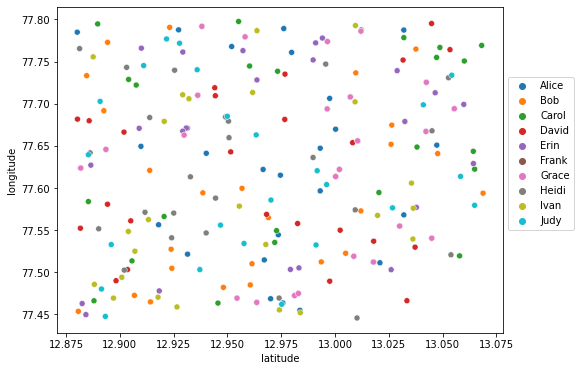

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])

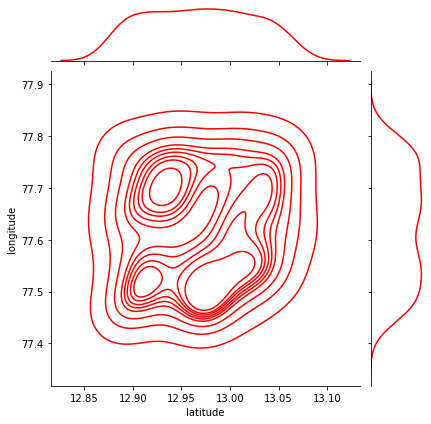

In [8]:
sns.jointplot(x='latitude', y='longitude', data=df, color='red', kind='kde')

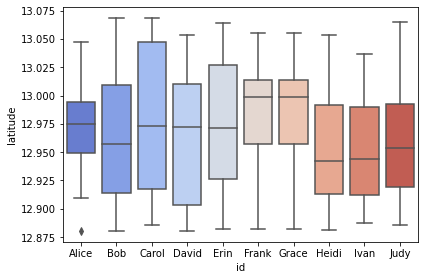

In [9]:
sns.boxplot(x= 'id', y= 'latitude', data = df, palette = 'coolwarm')
plt.tight_layout()

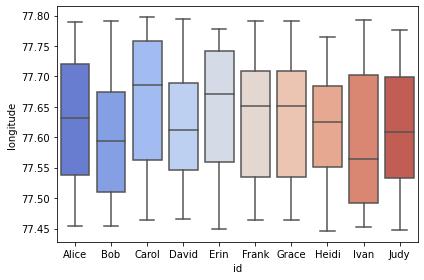

In [10]:
sns.boxplot(x='id', y='longitude', data=df, palette='coolwarm')
plt.tight_layout()

In [11]:
epsilon = 0.0018288 #distance of 6ft in km
model = DBSCAN(eps = epsilon, min_samples = 2, metric = "haversine").fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

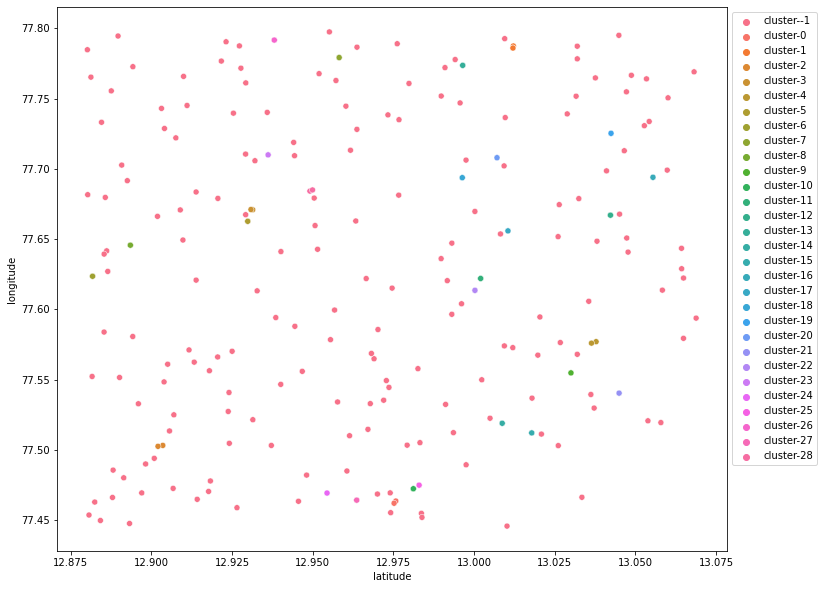

In [12]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

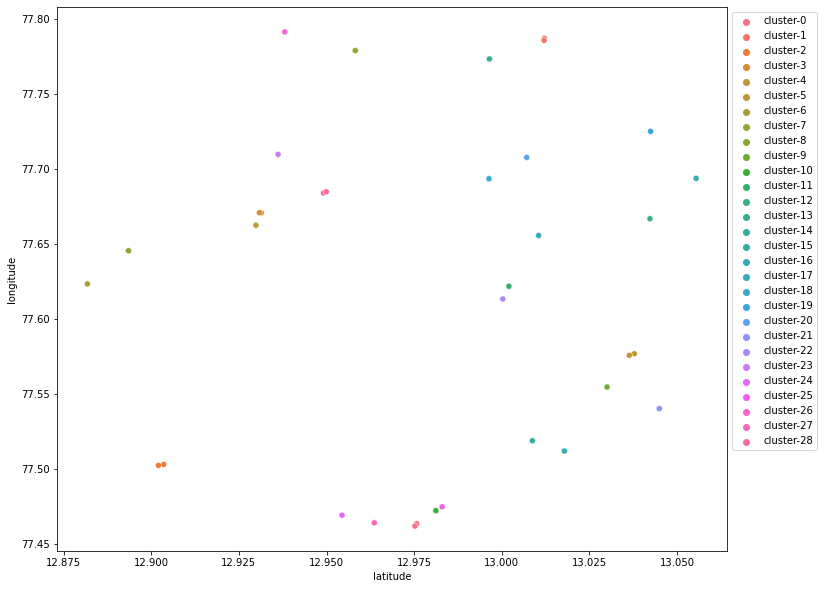

In [13]:
ids = df[(df['cluster'] == -1)].index 
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [14]:
def get_infected_names(input_name):
    df = pd.read_json("train_dataset.json")
    epsilon - 0.0018288 #6ft in km
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass 
            else:
                input_name_clusters.append(df['cluster'][i])
                
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [15]:
get_infected_names('Alice')

['Judy']

In [16]:
get_infected_names('David')

['Heidi']